 # Dictionary


| Column Name        | Description  |
|--------------------|-------------|
| *customerID*     | Unique identifier for each customer. |
| *gender*        | Customer’s gender (Male or Female). |
| *SeniorCitizen* | Whether the customer is a senior citizen (1 = Yes, 0 = No). |
| *Partner*       | Whether the customer has a partner (Yes or No). |
| *Dependents*    | Whether the customer has dependents (children, relatives, etc.) (Yes or No). |
| *tenure*        | Number of months the customer has been with the company. |
| *PhoneService*  | Whether the customer has a phone service (Yes or No). |
| *MultipleLines* | Whether the customer has multiple phone lines (Yes, No, or No phone service). |
| *InternetService* | Type of internet service (DSL, Fiber optic, No). |
| *OnlineSecurity* | Whether the customer has an online security service (Yes, No, or No internet service). |
| *OnlineBackup*  | Whether the customer has online backup service (Yes, No, or No internet service). |
| *DeviceProtection* | Whether the customer has device protection (Yes, No, or No internet service). |
| *TechSupport*   | Whether the customer has tech support (Yes, No, or No internet service). |
| *StreamingTV*   | Whether the customer has a streaming TV service (Yes, No, or No internet service). |
| *StreamingMovies* | Whether the customer has a streaming movie service (Yes, No, or No internet service). |
| *Contract*      | Type of contract (Month-to-month, One year, Two year). |
| *PaperlessBilling* | Whether the customer has opted for paperless billing (Yes or No). |
| *PaymentMethod* | How the customer pays (Electronic check, Mailed check, Bank transfer, Credit card). |
| *MonthlyCharges* | The amount the customer is charged per month. |
| *TotalCharges*  | The total amount charged to the customer over their tenure. |
| *Churn*        | Whether the customer has left the company (Yes = churned, No = stayed). |

### Import Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind


# Data Preparation 

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We need to convert the totaCharges into a float.

In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [6]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [7]:
binary_cols = [ 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn']
for col in binary_cols : 
    print(f"the unique value of {col} is : {df[col].unique()}\n" )


the unique value of Partner is : ['Yes' 'No']

the unique value of Dependents is : ['No' 'Yes']

the unique value of PhoneService is : ['No' 'Yes']

the unique value of MultipleLines is : ['No phone service' 'No' 'Yes']

the unique value of OnlineSecurity is : ['No' 'Yes' 'No internet service']

the unique value of OnlineBackup is : ['Yes' 'No' 'No internet service']

the unique value of DeviceProtection is : ['No' 'Yes' 'No internet service']

the unique value of TechSupport is : ['No' 'Yes' 'No internet service']

the unique value of StreamingTV is : ['No' 'Yes' 'No internet service']

the unique value of StreamingMovies is : ['No' 'Yes' 'No internet service']

the unique value of PaperlessBilling is : ['Yes' 'No']

the unique value of Churn is : ['No' 'Yes']



we need to replace 'No internet service' and 'No phone service' into a 'No' for better visulsation

In [8]:
for col in binary_cols : 
    df[col] = df[col].replace({'No phone service' : 'No', 'No internet service' : 'No'})
    print(f"the unique value of {col} is {df[col].unique()} \n ")

the unique value of Partner is ['Yes' 'No'] 
 
the unique value of Dependents is ['No' 'Yes'] 
 
the unique value of PhoneService is ['No' 'Yes'] 
 
the unique value of MultipleLines is ['No' 'Yes'] 
 
the unique value of OnlineSecurity is ['No' 'Yes'] 
 
the unique value of OnlineBackup is ['Yes' 'No'] 
 
the unique value of DeviceProtection is ['No' 'Yes'] 
 
the unique value of TechSupport is ['No' 'Yes'] 
 
the unique value of StreamingTV is ['No' 'Yes'] 
 
the unique value of StreamingMovies is ['No' 'Yes'] 
 
the unique value of PaperlessBilling is ['Yes' 'No'] 
 
the unique value of Churn is ['No' 'Yes'] 
 


# Exploratory Data Analysis (EDA)

### What are the key factors contributing to customer churn?

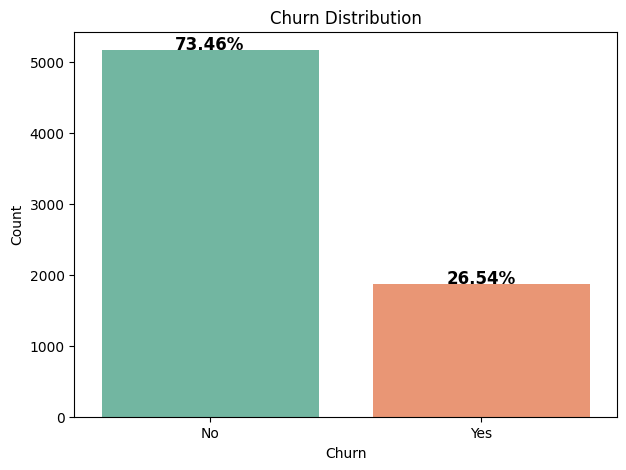

Churn Rate:
  No: 73.46% 
  Yes: 26.54% 


In [9]:


# Plot the countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Churn', data=df, hue='Churn', palette='Set2', legend=False)

# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100

# Add percentages on the bars
for p, rate in zip(ax.patches, churn_rate):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 10, f'{rate:.2f}%', 
            ha='center', fontsize=12, fontweight='bold')

# Title and display
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Print churn rate
print("Churn Rate:")
for category, rate in churn_rate.items():
    print(f"  {category}: {rate:.2f}% ")


In [10]:
df['Churn'] = df['Churn'].map({'Yes' : 1,'No' : 0})

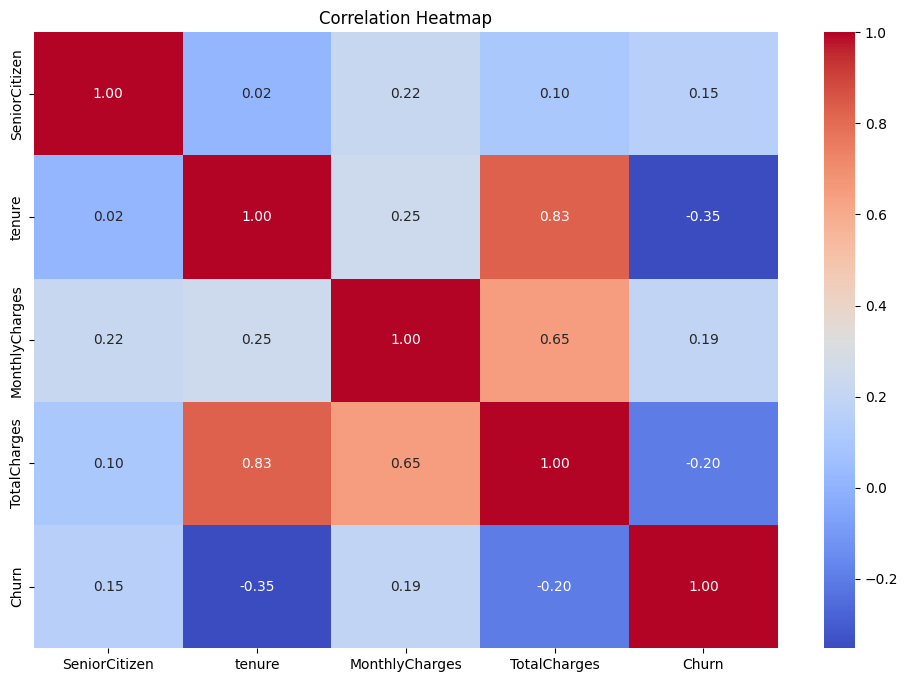

In [11]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numerical columns
correlation_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


1-  Is there a relationship between tenure  and churn?

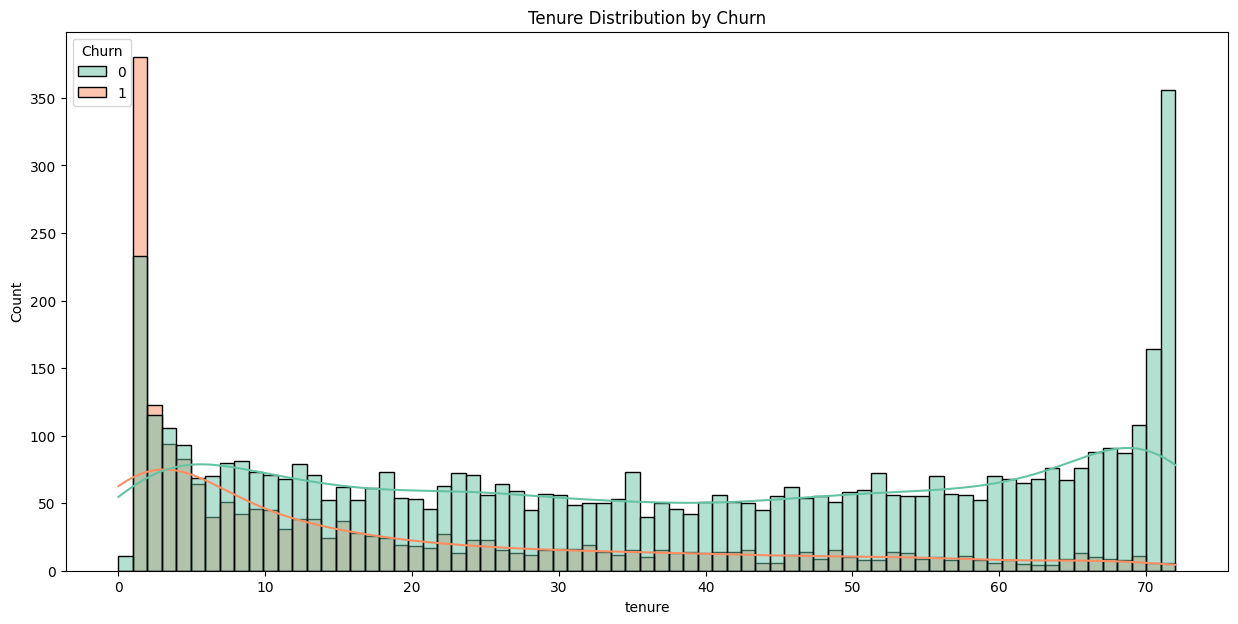

In [12]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True,bins=73,  palette='Set2')
plt.title('Tenure Distribution by Churn')
plt.show()

In [13]:
churned = df[df['Churn'] == 1]['tenure']
not_churned = df[df['Churn'] == 0]['tenure']

# Perform T-test
stat, p = ttest_ind(churned, not_churned, equal_var=False)
print(f"T-test for Tenure and Churn: p-value = {p:.240f}")
if p < 0.05:
    print(f"✅ Significant relationship between tenure and Churn (p < 0.05)\n")
else:
    print(f"❌ No significant relationship between tenure and Churn (p ≥ 0.05)\n")

T-test for Tenure and Churn: p-value = 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000119549455
✅ Significant relationship between tenure and Churn (p < 0.05)



p < 0.05, tenure significantly impacts churn.

2- Is there a relationship between contract type and churn?

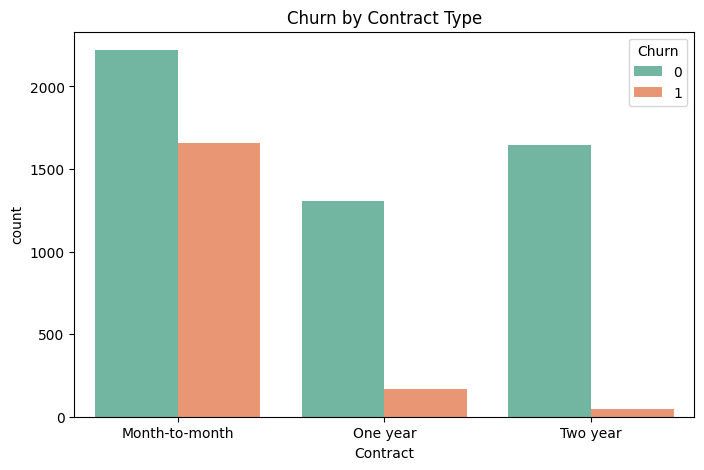

Churn Rates by Contract:
Churn                   0          1
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858 


In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Contract Type')
plt.show()

# Calculate churn rates per contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print(f"Churn Rates by Contract:\n{contract_churn} ")

In [15]:
contingency_table = pd.crosstab(df["Contract"], df["Churn"])
stat, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Contract and Churn: p-value = {p:.260f}")
if p < 0.05:
    print(f"✅ Significant relationship between Contract and Churn (p < 0.05)\n")
else:
    print(f"❌ No significant relationship between Contract and Churn (p ≥ 0.05)\n")

Chi-Square Test for Contract and Churn: p-value = 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000586
✅ Significant relationship between Contract and Churn (p < 0.05)



 p < 0.05, contract type is significantly associated with churn

3- Is there a relationship between  service usage and churn?

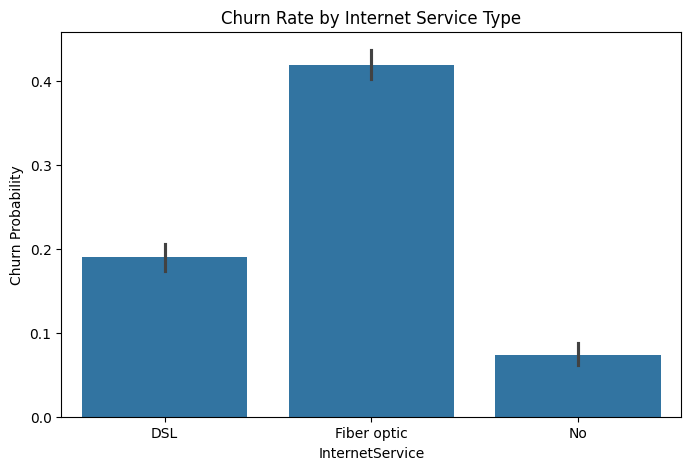

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x=df["InternetService"], y=df["Churn"])
plt.title("Churn Rate by Internet Service Type")
plt.ylabel("Churn Probability")
plt.show()

In [17]:
contingency_table = pd.crosstab(df["InternetService"], df["Churn"])
stat, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Contract and Churn: p-value = {p:.180f}")
if p < 0.05:
    print(f"✅ Significant relationship between Internet Service and Churn (p < 0.05)\n")
else:
    print(f"❌ No significant relationship between Internet Service and Churn (p ≥ 0.05)\n")

Chi-Square Test for Contract and Churn: p-value = 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000957178822284054444931
✅ Significant relationship between Internet Service and Churn (p < 0.05)



### How are MonthlyCharges and TotalCharges distributed among churned and retained customers?

1 - Do customers who churn tend to have higher or lower charges compared to those who stay?

-  Histogram of Monthly Charges

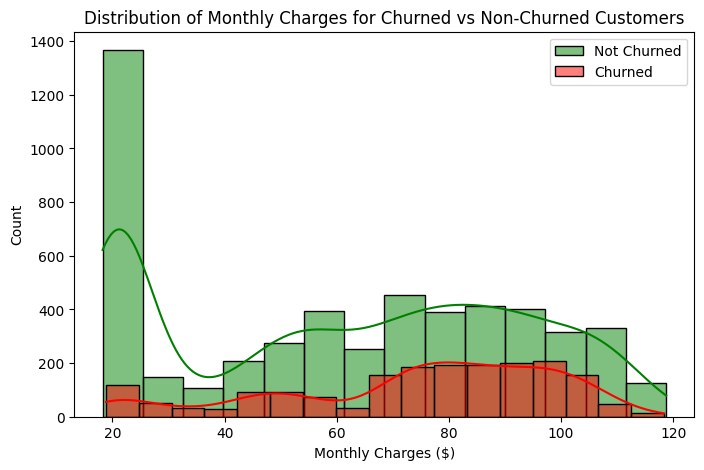

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Churn'] == 0]['MonthlyCharges'], color="green", label="Not Churned", kde=True)
sns.histplot(df[df['Churn'] == 1]['MonthlyCharges'], color="red", label="Churned", kde=True)
plt.legend()
plt.title("Distribution of Monthly Charges for Churned vs Non-Churned Customers")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()

- violinplot of Monthly Charges

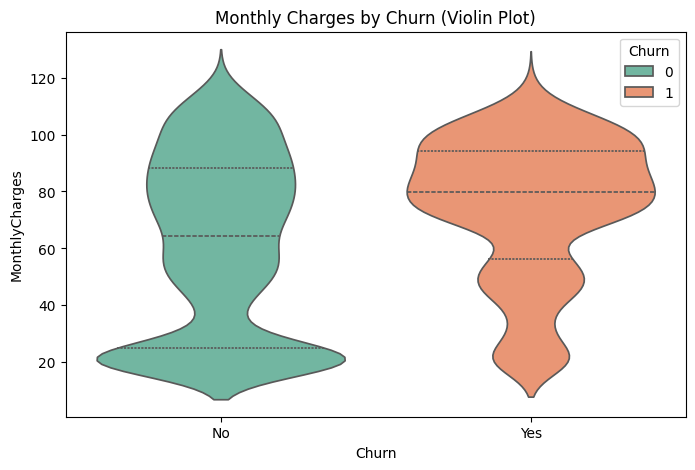

In [19]:

plt.figure(figsize=(8, 5))
sns.violinplot(x=df['Churn'].map({0: "No", 1: "Yes"}), y='MonthlyCharges',hue = 'Churn', data=df, palette='Set2', inner='quartile')
plt.title('Monthly Charges by Churn (Violin Plot)')
plt.show()

 - Histogram of Total Charges

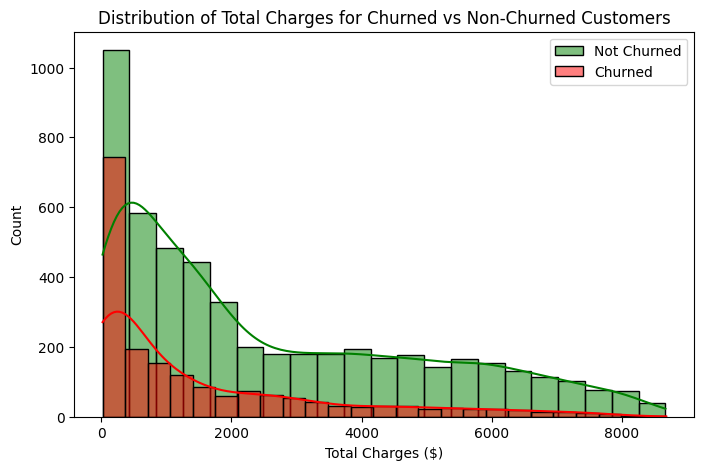

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Churn'] == 0]['TotalCharges'], color="green", label="Not Churned", kde=True)
sns.histplot(df[df['Churn'] == 1]['TotalCharges'], color="red", label="Churned", kde=True)
plt.legend()
plt.title("Distribution of Total Charges for Churned vs Non-Churned Customers")
plt.xlabel("Total Charges ($)")
plt.ylabel("Count")
plt.show()


- Statistical Analysis (T-test)

In [21]:
churned = df[df['Churn'] == 1]
not_churned = df[df['Churn'] == 0]

# Perform T-tests
for col in ['MonthlyCharges', 'TotalCharges']:
    stat, p = ttest_ind(churned[col], not_churned[col], equal_var=False)
    print(f"T-test for {col}: p-value = {p:.75f}")
    if p < 0.05:
        print(f"✅ Significant relationship between {col} and Churn (p < 0.05)\n")
    else:
        print(f"❌ No significant relationship between {col} and Churn \n")


T-test for MonthlyCharges: p-value = 0.000000000000000000000000000000000000000000000000000000000000000000000000859
✅ Significant relationship between MonthlyCharges and Churn (p < 0.05)

T-test for TotalCharges: p-value = nan
❌ No significant relationship between TotalCharges and Churn 



### Are there differences in churn based on demographic factors such as gender, seniority, or whether the customer has a partner or dependents?


1- What is the churn rate for male vs female customers?

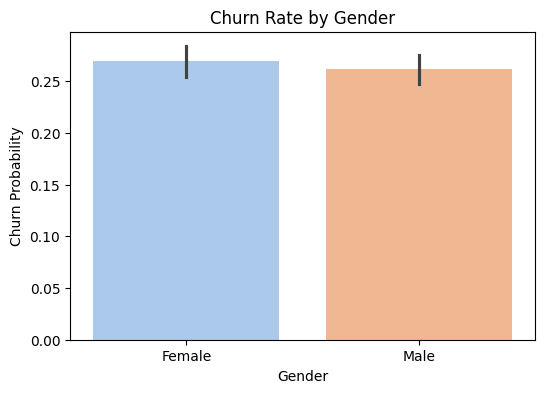

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['gender'], y=df['Churn'], hue =df['gender'],  palette='pastel' )
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Probability")
plt.show()

In [23]:
contingency_table = pd.crosstab(df['gender'], df['Churn'])
stat, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Senior Citizen and Churn: p-value = {p:.40f}")
if p < 0.05:
    print(f"✅ Significant relationship between gendre and Churn (p < 0.05)\n")
else:
    print(f"❌ No significant relationship between gendre and Churn (p ≥ 0.05)\n")

Chi-Square Test for Senior Citizen and Churn: p-value = 0.4865787360561859564711539860581979155540
❌ No significant relationship between gendre and Churn (p ≥ 0.05)



2- Does being a senior citizen increase the likelihood of churn?

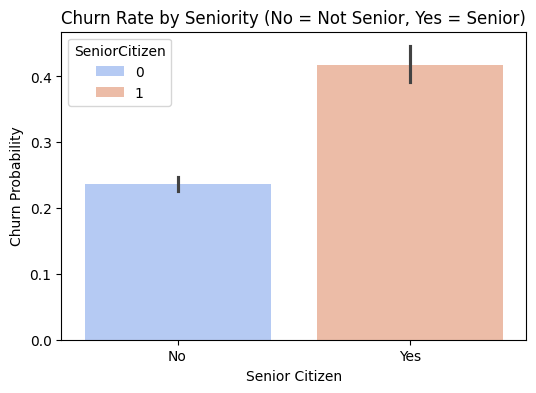

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['SeniorCitizen'].map({0: "No", 1: "Yes"}), y=df['Churn'], hue =df['SeniorCitizen'] , palette='coolwarm')
plt.title("Churn Rate by Seniority (No = Not Senior, Yes = Senior)")
plt.xlabel("Senior Citizen")
plt.ylabel("Churn Probability")
plt.show()

In [25]:
contingency_table = pd.crosstab(df['SeniorCitizen'], df['Churn'])
stat, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Senior Citizen and Churn: p-value = {p:.40f}")
if p < 0.05:
    print(f"✅ Significant relationship between SeniorCitizen and Churn (p < 0.05)\n")
else:
    print(f"❌ No significant relationship between SeniorCitizen and Churn (p ≥ 0.05)\n")

Chi-Square Test for Senior Citizen and Churn: p-value = 0.0000000000000000000000000000000000015101
✅ Significant relationship between SeniorCitizen and Churn (p < 0.05)



senior status significantly affects churn 👍

 Family Status (Partner & Dependents) and Churn

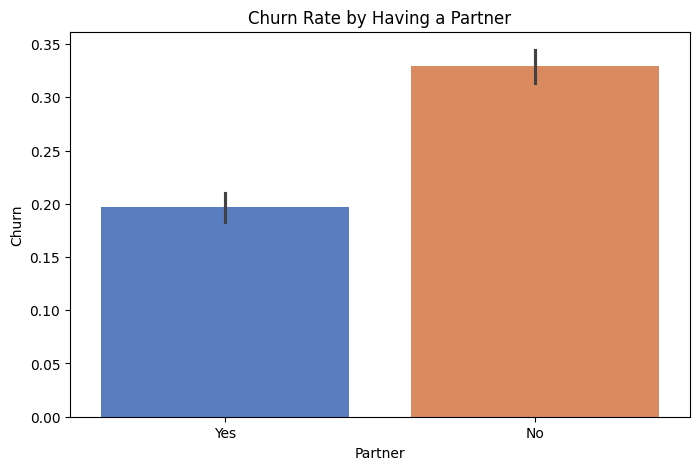


 Chi-Square Test for Partner and Churn: p-value = 0.0000000000000000000000000000000000021399 



✅ Significant relationship between Partner and Churn (p < 0.05)



In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='Partner', y='Churn',hue = 'Partner', data=df, palette='muted')
plt.title("Churn Rate by Having a Partner")
plt.show()

contingency_table = pd.crosstab(df['Partner'], df['Churn'])
stat, p, _, _ = chi2_contingency(contingency_table)
print(f"\n Chi-Square Test for Partner and Churn: p-value = {p:.40f} \n\n\n")
if p < 0.05:
    print(f"✅ Significant relationship between Partner and Churn (p < 0.05)\n")
else:
    print(f"❌ No significant relationship between Partner and Churn (p ≥ 0.05)\n")


having a partner significantly impacts churn 👍

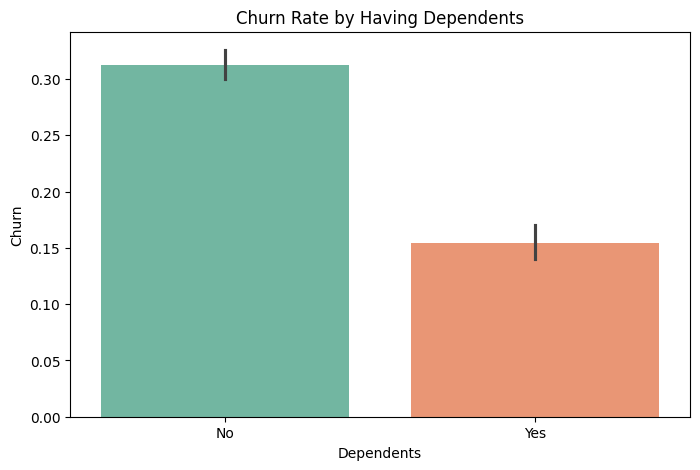


 Chi-Square Test for Dependents and Churn: p-value = 0.00000000000000000000000000000000000000000049249217 



✅ Significant relationship between Dependents and Churn (p < 0.05)



In [27]:

plt.figure(figsize=(8,5))
sns.barplot(x='Dependents', y='Churn', hue = 'Dependents', data=df, palette='Set2')
plt.title("Churn Rate by Having Dependents")
plt.show()
contingency_table = pd.crosstab(df['Dependents'], df['Churn'])
stat, p, _, _ = chi2_contingency(contingency_table)
print(f"\n Chi-Square Test for Dependents and Churn: p-value = {p:.50f} \n\n\n")
if p < 0.05:
    print(f"✅ Significant relationship between Dependents and Churn (p < 0.05)\n")
else:
    print(f"❌ No significant relationship between Dependents and Churn (p ≥ 0.05)\n")


### How do customers with different service subscriptions (e.g., Phone Service, Internet Service, Streaming Services) behave in terms of churn?

1 - Do customers who have internet service or streaming TV services have a lower churn rate?

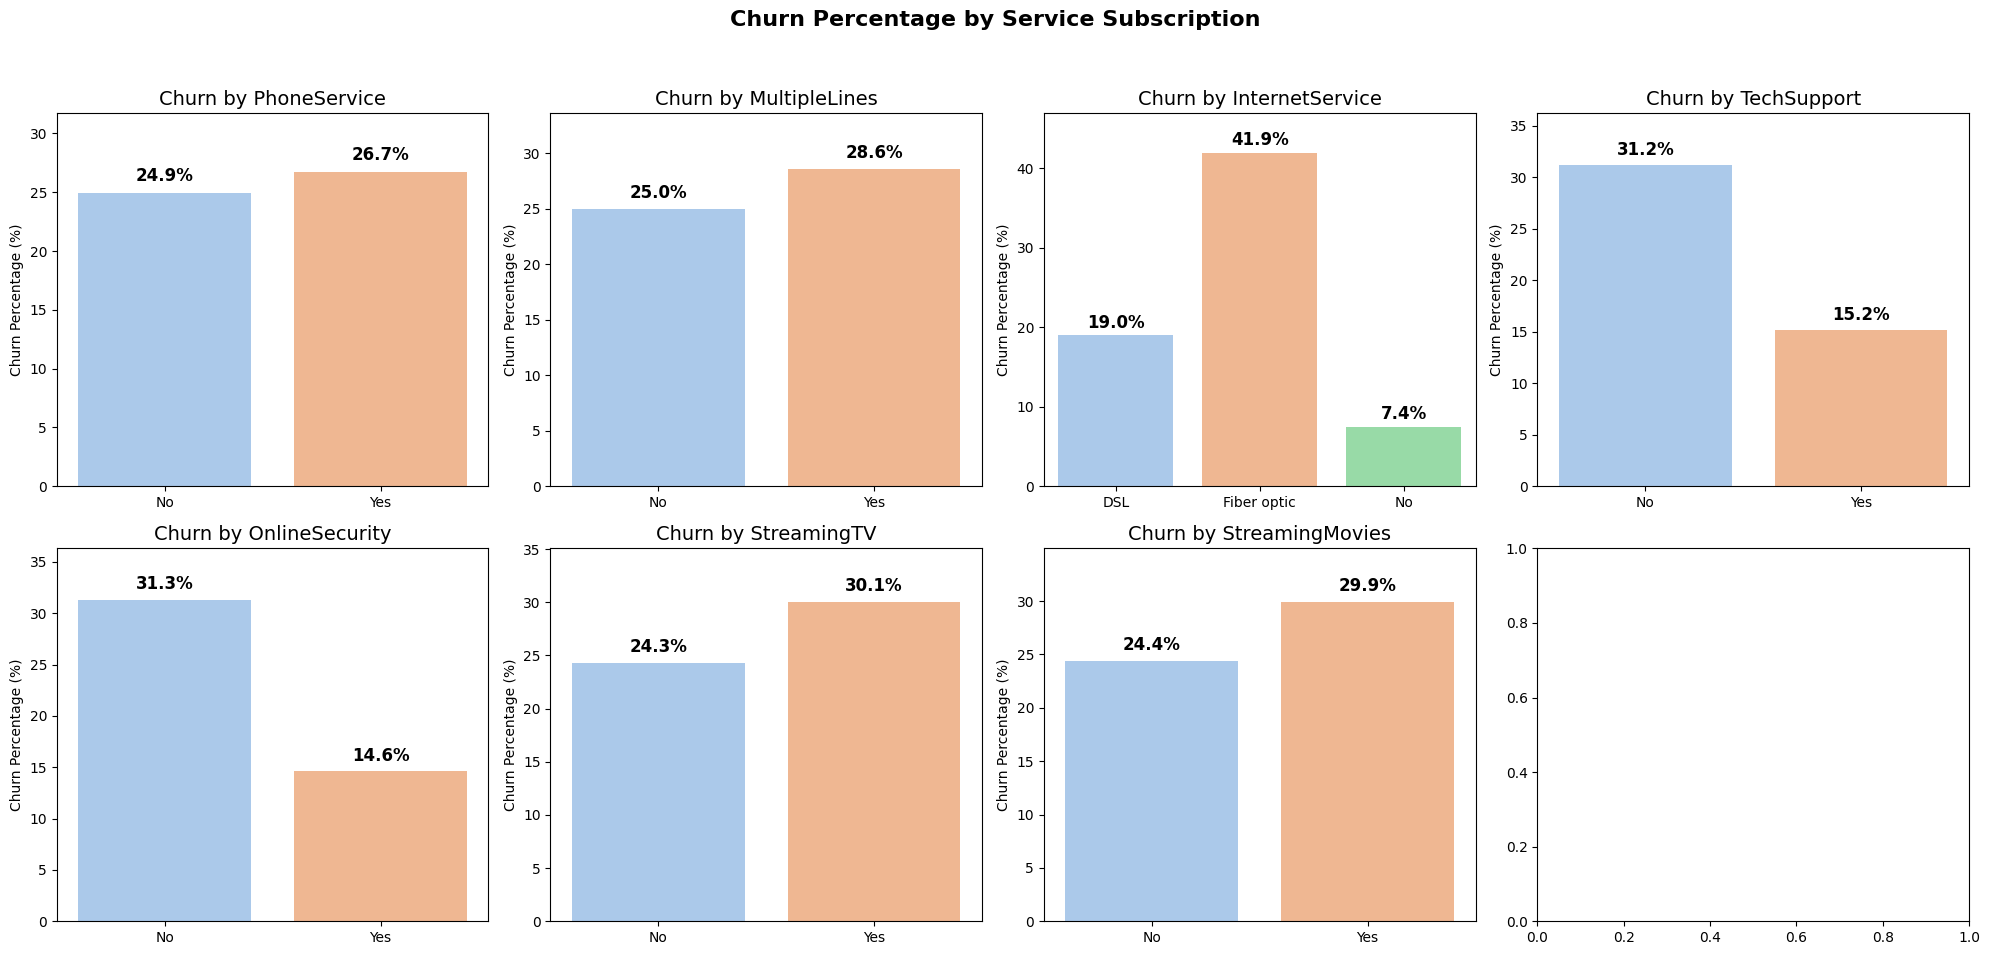

In [28]:

# List of service-related columns
service_columns = ["PhoneService", "MultipleLines", "InternetService", 
                   "TechSupport", "OnlineSecurity", "StreamingTV", "StreamingMovies"]

# Create subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Churn Percentage by Service Subscription", fontsize=16, fontweight="bold")

# Loop through each service column and create a barplot
for i, col in enumerate(service_columns):
    row, col_num = divmod(i, 4)  # Determine row and column position
    
    # Calculate churn percentage for each category
    churn_percent = df.groupby(col)['Churn'].mean() * 100  # Convert to percentage
    
    # Create barplot (fixing the warning)
    sns.barplot(x=churn_percent.index, y=churn_percent.values, hue=churn_percent.index,  
                ax=axes[row, col_num], palette="pastel", legend=False)
    
    # Add percentage labels
    for index, value in enumerate(churn_percent.values):
        axes[row, col_num].text(index, value + 1, f"{value:.1f}%", ha="center", fontsize=12, fontweight="bold")
    
    # Titles and labels
    axes[row, col_num].set_title(f"Churn by {col}", fontsize=14)
    axes[row, col_num].set_ylabel("Churn Percentage (%)")
    axes[row, col_num].set_xlabel("")
    axes[row, col_num].set_ylim(0, max(churn_percent.values) + 5)  # Adjust y-axis limit

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [29]:
contingency_table = pd.crosstab(df['Dependents'], df['Churn'])
stat, p, _, _ = chi2_contingency(contingency_table)
print(f"\n Chi-Square Test for Dependents and Churn: p-value = {p:.50f} \n\n\n")


 Chi-Square Test for Dependents and Churn: p-value = 0.00000000000000000000000000000000000000000049249217 





In [30]:

from scipy import stats
# List of service-related columns
service_columns = ["PhoneService", "MultipleLines", "InternetService", 
                   "TechSupport", "OnlineSecurity", "StreamingTV", "StreamingMovies"]

# Drop rows with missing values in service-related columns
df = df.dropna(subset=service_columns)

# Ensure all columns are categorical (string/object)
df[service_columns] = df[service_columns].astype(str)

# Function for Chi-Square Test
def chi_square_test(df, column):
    # Check if the column has at least two unique categories
    if df[column].nunique() < 2:
        print(f"⚠️ Skipping {column}: Only one unique value present.")
        return
    
    contingency_table = pd.crosstab(df[column], df['Churn'])
    stat, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\n🔹 Chi-Square Test for {column}:")
    print(f"Chi-Square Statistic: {stat:.4f}, p-value: {p:.5f}")

    if p < 0.05:
        print(f"✅ Significant relationship between {column} and Churn (p < 0.05)\n")
    else:
        print(f"❌ No significant relationship between {column} and Churn (p ≥ 0.05)\n")

# Run Chi-Square tests for all service columns
for col in service_columns:
    chi_square_test(df, col)



🔹 Chi-Square Test for PhoneService:
Chi-Square Statistic: 0.9150, p-value: 0.33878
❌ No significant relationship between PhoneService and Churn (p ≥ 0.05)


🔹 Chi-Square Test for MultipleLines:
Chi-Square Statistic: 11.1433, p-value: 0.00084
✅ Significant relationship between MultipleLines and Churn (p < 0.05)


🔹 Chi-Square Test for InternetService:
Chi-Square Statistic: 732.3096, p-value: 0.00000
✅ Significant relationship between InternetService and Churn (p < 0.05)


🔹 Chi-Square Test for TechSupport:
Chi-Square Statistic: 190.1668, p-value: 0.00000
✅ Significant relationship between TechSupport and Churn (p < 0.05)


🔹 Chi-Square Test for OnlineSecurity:
Chi-Square Statistic: 205.6331, p-value: 0.00000
✅ Significant relationship between OnlineSecurity and Churn (p < 0.05)


🔹 Chi-Square Test for StreamingTV:
Chi-Square Statistic: 27.8625, p-value: 0.00000
✅ Significant relationship between StreamingTV and Churn (p < 0.05)


🔹 Chi-Square Test for StreamingMovies:
Chi-Square Statis

### How does the payment method affect the churn rate?


1- Is there a significant difference in churn rates based on payment method?

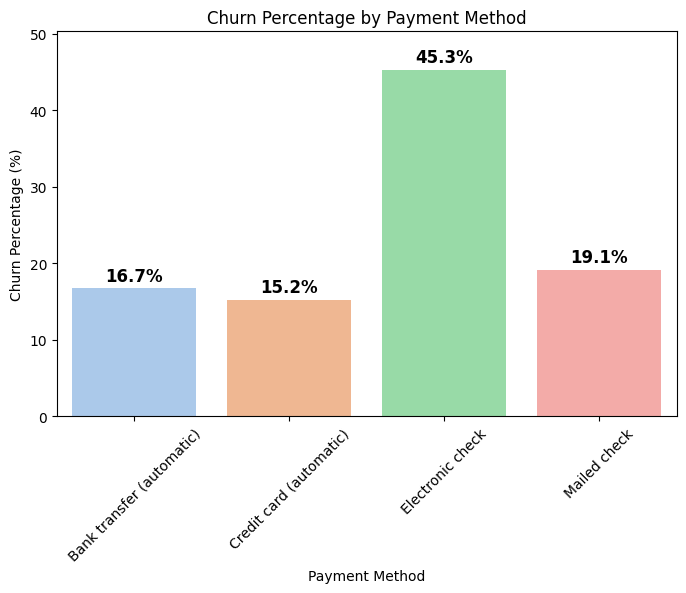


🔹 Chi-Square Test for Payment Method and Churn:
Chi-Square Statistic: 648.1423, p-value: 0.00000
✅ Significant relationship between Payment Method and Churn (p < 0.05)


In [31]:

# Calculate churn percentage for each payment method
churn_percent = df.groupby("PaymentMethod")["Churn"].mean() * 100  # Convert to percentage

# Create the bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=churn_percent.index, y=churn_percent.values,hue =churn_percent.index, palette="pastel")

# Add percentage labels
for index, value in enumerate(churn_percent.values):
    plt.text(index, value + 1, f"{value:.1f}%", ha="center", fontsize=12, fontweight="bold")

# Formatting the plot
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Churn Percentage by Payment Method")
plt.ylabel("Churn Percentage (%)")
plt.xlabel("Payment Method")
plt.ylim(0, max(churn_percent.values) + 5)  # Adjust y-axis limit
plt.show()
# Create a contingency table
contingency_table = pd.crosstab(df["PaymentMethod"], df["Churn"])

# Perform Chi-Square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"\n🔹 Chi-Square Test for Payment Method and Churn:")
print(f"Chi-Square Statistic: {stat:.4f}, p-value: {p:.5f}")

# Interpret results
if p < 0.05:
    print("✅ Significant relationship between Payment Method and Churn (p < 0.05)")
else:
    print("❌ No significant relationship between Payment Method and Churn (p ≥ 0.05)")

# Building a Churn Prediction Model 🤖

### Load Libraries and Import Data

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [33]:
df_md = df.copy()

- Remove columns which has no effect 

In [34]:
df_md = df_md.drop(columns=['TotalCharges', 'PhoneService','customerID','gender'])

In [35]:
df_md.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


In [36]:
print(df_md.isnull().sum())

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64


 - Convert Data Types as Needed

In [37]:
# One-hot encoding for other categorical variables
df_md = pd.get_dummies(df_md, columns=['MultipleLines', 'SeniorCitizen', 'Partner', 'Dependents', 
                                 'InternetService', 'OnlineSecurity', 
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                 'StreamingTV', 'StreamingMovies', 'Contract', 
                                 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [38]:
df_md.head()

,tenure,MonthlyCharges,Churn,MultipleLines_Yes,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,0,False,False,False,False,False,False,True,...,True,False,False,False,True,False,False,False,False,True
2,2,53.85,1,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,0,False,False,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
4,2,70.70,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


-  Scale the Data

In [39]:
scaler = StandardScaler()
df_md[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df_md[['tenure', 'MonthlyCharges']])

- Split Data into Training and Testing Sets

In [40]:
X = df_md.drop(columns = ['Churn'], axis=1)
y = df_md['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

tenure                                   0
MonthlyCharges                           0
MultipleLines_Yes                        0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
dtype: int64
tenure                                   0
MonthlyCharges                           0
MultipleLines_Yes                        

### Modeling and Prediction

-Find the Best Logistic Regression Parameters

In [42]:
param_grid_logreg = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],  # Type of regularization
    "solver": ["liblinear", "saga"]  # Solvers that support L1 and L2
}

# Perform grid search
grid_search_logreg = GridSearchCV(
    LogisticRegression(random_state=42, class_weight="balanced"),  # Handle class imbalance
    param_grid_logreg,
    cv=3,  # 3-fold cross-validation
    scoring="roc_auc",  # Optimize for AUC score
    n_jobs=-1
)

grid_search_logreg.fit(X_train, y_train)  # Use scaled data

# Print best parameters
print("Best Logistic Regression Parameters:", grid_search_logreg.best_params_)

Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


-Train the Logistic Regression Model

In [43]:

# instantiate the model
model = LogisticRegression(C=10, penalty= 'l2', solver='saga', random_state=42)


# fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Area Under the ROC Curve (AUROC): {auc_score:.3f}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Area Under the ROC Curve (AUROC): 0.861
Accuracy: 0.8190205819730305
Training set score: 0.8007
Test set score: 0.8190
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:
[[938  98]
 [157 216]]
